In [72]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
#warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouseDataFrame = pd.read_csv(mouse_drug_data_to_load)
trialDataFrame = pd.read_csv(clinical_trial_data_to_load)

    #trialDataFrame[trialDataFrame["Mouse ID"]=="f234"]

# Combine the data into a single dataset

mouseTrailDataFrame = pd.merge(mouseDataFrame,trialDataFrame,on="Mouse ID")


# Display the data table for preview

mouseTrailDataFrame.head(27)

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


## Tumor Response to Treatment

In [73]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumorVolFrame = mouseTrailDataFrame[["Drug","Timepoint","Tumor Volume (mm3)"]].groupby(["Drug","Timepoint"])#.mean()
tumorVolFrame =tumorVolFrame.mean()

#Convert to DataFrame
#tumorVol = tumorVol
#tumorVolFrame = pd.DataFrame(tumorVol.describe()["Tumor Volume (mm3)","mean"]) #bad way to get mean and sem


# Preview DataFrame
tumorVolFrame.head(20)


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421

In [74]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumorVolSem = mouseTrailDataFrame[["Drug","Timepoint","Tumor Volume (mm3)"]].groupby(["Drug","Timepoint"]).sem()
#tumorVolSem.columns
tumorVolSem = tumorVolSem.rename(columns={"Tumor Volume (mm3)":"Tumor Vol SEM"})

# Preview DataFrame

tumorVolSem.head()

Tumor Vol SEM
Drug      Timepoint               
Capomulin 0               0.000000
          5               0.448593
          10              0.702684
          15              0.838617
          20              0.909731

In [75]:
# Minor Data Munging to Re-Format the Data Frames
#tumorVolSem.coluns
tumorVolSem = tumorVolSem.reset_index()
tumorVolFrame = tumorVolFrame.reset_index()

tumorVolSem = tumorVolSem.pivot(index= "Timepoint",columns="Drug",values="Tumor Vol SEM")
tumorVolFrame = tumorVolFrame.pivot(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")



# Preview that Reformatting worked
tumorVolSem.head()
tumorVolFrame.head()

#CAUTIONNNNNNN running this more then once MESSES WITH INDECES

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


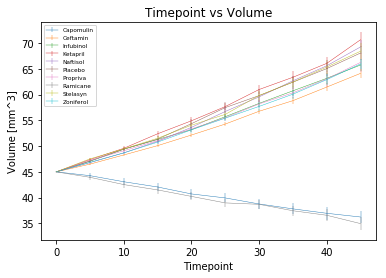

<Figure size 432x288 with 0 Axes>

In [76]:
# Generate the Plot (with Error Bars)
for i in tumorVolFrame.columns:
    
    plt.errorbar(tumorVolFrame.index,tumorVolFrame[i],yerr = tumorVolSem[i], linewidth=0.45)
plt.title("Timepoint vs Volume")
plt.xlabel('Timepoint')
plt.ylabel("Volume [mm^3]")

plt.legend(loc="upper left",fontsize="xx-small")
plt.show()
plt.savefig("TimepointvsVolume.png")
# Save the Figure



![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [77]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

metSiteData = mouseTrailDataFrame[["Drug","Timepoint","Metastatic Sites"]].groupby(["Drug","Timepoint"])


# Convert to DataFrame
metSiteDataFrame = metSiteData.mean()
# Preview DataFrame
metSiteDataFrame.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [78]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint & Convert to DataFrame
semMetSiteDataFrame = metSiteData.sem()
# Preview DataFrame
semMetSiteDataFrame = semMetSiteDataFrame.rename(columns={"Metastatic Sites":"Metastatic Sites SEM"})
semMetSiteDataFrame.head()

Metastatic Sites SEM
Drug      Timepoint                      
Capomulin 0                      0.000000
          5                      0.074833
          10                     0.125433
          15                     0.132048
          20                     0.161621

In [79]:
# Minor Data Munging to Re-Format the Data Frames
semMetSiteDataFrame = semMetSiteDataFrame.reset_index()
semMetSiteDataFrame = semMetSiteDataFrame.pivot(index="Timepoint",columns = "Drug",values = "Metastatic Sites SEM")

metSiteDataFrame = metSiteDataFrame.reset_index()
print(metSiteDataFrame.columns)
metSiteDataFrame = metSiteDataFrame.pivot(index="Timepoint",columns = "Drug",values = "Metastatic Sites")
#Preview that Reformatting worked


metSiteDataFrame

Index(['Drug', 'Timepoint', 'Metastatic Sites'], dtype='object')


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


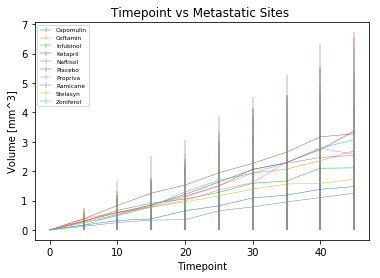

<Figure size 432x288 with 0 Axes>

In [80]:
# Generate the Plot (with Error Bars)
for i in metSiteDataFrame.columns:
    
    plt.errorbar(metSiteDataFrame.index,metSiteDataFrame[i],yerr = metSiteDataFrame[i], linewidth=0.45)
plt.title("Timepoint vs Metastatic Sites ")
plt.xlabel('Timepoint')
plt.ylabel("Volume [mm^3]")

plt.legend(loc="upper left",fontsize="xx-small")
plt.show()
# Save the Figure
plt.savefig("TimepointvsMetastaticSites.png")
# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [81]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mouseCount = mouseTrailDataFrame[["Drug","Timepoint","Tumor Volume (mm3)"]].groupby(["Drug","Timepoint"]).describe()
mouseCount["Count"] = mouseCount["Tumor Volume (mm3)","count"]
mouseCount = mouseCount[["Count"]]

# Preview DataFrame
mouseCount.head(5)

Count
                         
Drug      Timepoint      
Capomulin 0          25.0
          5          25.0
          10         25.0
          15         24.0
          20         23.0

In [82]:
# Minor Data Munging to Re-Format the Data Frames
mouseCount = mouseCount.reset_index()
mouseCount = mouseCount.pivot(index= "Timepoint",columns= "Drug", values = "Count")
# Preview the Data Frame
mouseCount

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25.0,25.0,25.0,25.0,25.0,25.0,26.0,25.0,26.0,25.0
5,25.0,21.0,25.0,23.0,23.0,24.0,25.0,25.0,25.0,24.0
10,25.0,20.0,21.0,22.0,21.0,24.0,23.0,24.0,23.0,22.0
15,24.0,19.0,21.0,19.0,21.0,20.0,17.0,24.0,23.0,21.0
20,23.0,18.0,20.0,19.0,20.0,19.0,17.0,23.0,21.0,17.0
25,22.0,18.0,18.0,19.0,18.0,17.0,14.0,23.0,19.0,16.0
30,22.0,16.0,17.0,18.0,15.0,15.0,13.0,23.0,18.0,15.0
35,22.0,14.0,12.0,17.0,15.0,14.0,10.0,21.0,16.0,14.0
40,21.0,14.0,10.0,15.0,15.0,12.0,9.0,20.0,12.0,14.0


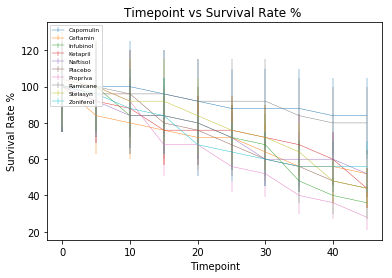

<Figure size 432x288 with 0 Axes>

In [84]:
# Generate the Plot (Accounting for percentages)
# Generate the Plot (with Error Bars)
for i in mouseCount.columns:
    
    plt.errorbar(mouseCount.index,mouseCount[i]/25*100,yerr =mouseCount[i], linewidth=0.45)
plt.title("Timepoint vs Survival Rate % ")
plt.xlabel('Timepoint')
plt.ylabel("Survival Rate %")

plt.legend(loc="upper left",fontsize="xx-small")
plt.show()
# Save the Figure
plt.savefig("TimepointvsSurvivalRate.png")
# Show the Figure
# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)